In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [36]:
# Aufgabe 2.1

# gib in die Funktionen die Spaltenvektoren beta und y rein und
# die Matrix x mit den Datenvektoren in den Zeilen
# und input als Zeilenvektor


def f(input, beta, x, y, b):
    summe = 0
    for i in range(0, x[:,0].size):
        summe = summe + (beta[i]*y[i]*np.dot(input,x[i,:]))
    return summe + b


#OneStep überschreibt den Vektor beta!!

def OneStep(i, j, beta, x, y, C, b):
    #betaiOld = beta[i-1]
    #betajOld = beta[j-1]
    delta = y[i-1]*((f(x[j-1,:], beta, x, y, b) - y[j-1])-(f(x[i-1,:], beta, x, y, b) - y[i-1]))
    s = y[i-1]*y[j-1]
    chi = np.dot(x[i-1,:],x[i-1,:]) + np.dot(x[j-1,:],x[j-1,:]) - 2*np.dot(x[i-1,:],x[j-1,:])
    gamma = s*beta[i-1] + beta[j-1]
                         
    if s == 1:
        L = max(0, gamma - C)
        H = min(C, C - gamma)
    else:
        L = max(0, -gamma)
        H = min(C, C - gamma)
                         
    if chi > 0:
        beta[i-1] = min(max(beta[i-1]+(delta/chi),L),H)
    elif delta > 0:
        beta[i-1] = L
    else:
        beta[i-1] = H
    
    beta[j-1] = gamma - s*beta[i-1]
    b = b - (1/2) *(f(x[i-1,:], beta, x, y, b) - y[i-1] + f(x[j-1,:], beta, x, y, b) - y[j-1])





In [37]:
# Aufgabe 2.2

#in data stehen die zweidimensionalen x Werte und die y Labels
x1 = np.array([np.random.exponential(4,20), np.random.exponential(4,20)]).transpose()
x2 = np.array([np.random.exponential(0.5,20),np.random.exponential(0.5,20)]).transpose()
Eins = np.array([np.ones(20)]).transpose()
MinusEins = -1*Eins
label_x1 = np.concatenate((x1.transpose(), MinusEins.transpose()))
label_x2 = np.concatenate((x2.transpose(), Eins.transpose()))

data = np.concatenate((label_x1.transpose(), label_x2.transpose()))

#print(data)


In [38]:
# Aufgabe 2.3

def SMO(iterations, data, C):
    beta = np.zeros(data[:,2].size)
    b = 0
    k = 0
    
    while k < iterations:
        i = random.randint(1,data[:,2].size)
        j = random.randint(1,data[:,2].size)
        if i!=j:
            OneStep(i, j, beta, data[:,0:2], data[:,2], C, b)
        k = k + 1
        
    l = 0
    diff = 0
    
    while beta[l] <= 0 and l < beta.size-1:
        l = l+1
    diff = f(data[l,0:2], beta, data[:,0:2], data[:,2], b) - data[l,2]
    
    for m in range(l+1, data[:,2].size):
        if beta[m] > 0:
            diff = np.append(diff, f(data[m,0:2], beta, data[:,0:2], data[:,2], b) - data[m,2])
    med = np.median(diff)
    b = b - med
    return np.append(b,beta)
    



In [41]:
# Aufgabe 2.3 (b)
iterations = 10000
C01 = 0.01
C1 = 1
C100 = 100

BBeta01 = SMO(iterations, data, C01)
#print(BBeta01)
#BBeta1 = SMO(iterations, data, C1)
#BBeta100 = SMO(iterations, data, C100)

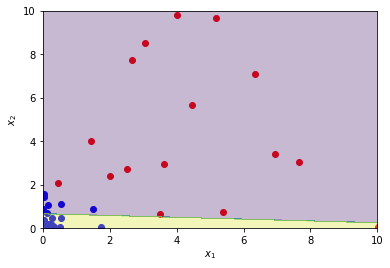

In [42]:
#Aufgabe 2.3 (b) plot 1

plt.scatter(data[0:20,0], data[0:20,1],c='red')
plt.scatter(data[20:40,0], data[20:40,1],c='blue')

def PlotContourLine(BBeta, func, value):
    samplenum = 1000
    minx = 0
    maxx = 10
    miny = 0
    maxy = 10
    xrange = np.arange(minx, maxx, (maxx-minx)/samplenum)
    yrange = np.arange(miny, maxy, (maxy-miny)/samplenum)
    X, Y = np.meshgrid(xrange,yrange)
    t = np.array([X.flatten(), Y.flatten()]).transpose()
    Z = func(t, BBeta[1:BBeta.size], data[:,0:2], data[:,2], BBeta[0])
    Z = np.reshape(Z,X.shape)
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    Z = np.where(Z > value, -1, 1)
    plt.contourf(X, Y, Z, alpha=0.3)

PlotContourLine(BBeta01, f, 0)


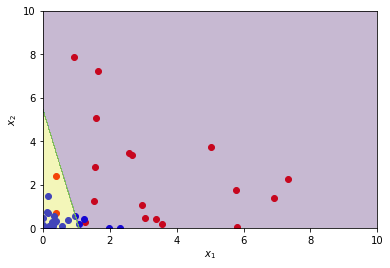

In [30]:
#Aufgabe 2.3 (b) plot 2
plt.scatter(data[0:20,0], data[0:20,1],c='red')
plt.scatter(data[20:40,0], data[20:40,1],c='blue')
PlotContourLine(BBeta1, f, 0)

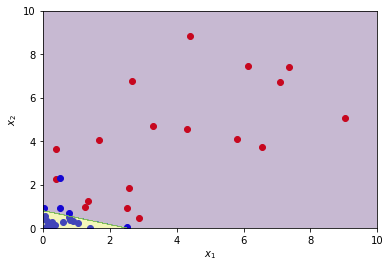

In [20]:
#Aufgabe 2.3 (b) plot 3
plt.scatter(data[0:20,0], data[0:20,1],c='red')
plt.scatter(data[20:40,0], data[20:40,1],c='blue')
PlotContourLine(BBeta100, f, 0)

In [ ]:
def LLS(X,y):
    xTx = np.dot(X.transpose(),X)
    xTy = np.dot(X.transpose(),y.transpose())
    return np.linalg.solve(xTx, xTy)

BBetaLLS = LLS(data[:,0:2],data[:,2])
PlotContourLine(BBetaLLS, f, 0)